## Preprocesamiento de datos

Información del dataset final a tomar en cuenta:
- Se incluyeron datos socioeconomicos tomados de la plataform INEC: desempleo (tasa de desempleo), Población, y Pobreza multidemencional.
- Se tomo informaicpon existente desde el 2016 al 2023, se todo la información del 2 trimestre del 2023
- Debido a cambio de metodologías del INEC, los datos no estan estandarizados, y se recopido de varias fuentes del INEC, donde    la metodología cambia de una año a otro, esto puede crear sesgos, pero es la información disponible.
- Cada variable se desagrego por Provincia y Cantón.
- Para cada Cantón (en las 3 variables socioeconomicas) solo existen datos de: Guayaquil, Quito, Cuenca, Machala, Ambato, por lo tanto se tomo en cuenta solo estos valores en Cantón. 

##### Tasa de Desempleo
- Para la Tasa de Desempleo, se tomo 3 dataset diferentes 2016- 2018, 2019-2021-2022, 2020 -2023 este ultimo cuenta solo con datos de Cantónes
- Se tomo datos de desempleo del ultimo trimestre de cada año.
- Para los valores faltantes (NULL values) en tasa de desempleo se Imputo Datos con la Mediana, por cada columnas, ya que esto no crea sesgos en los valores faltantes (provincia 2020 - 2023)

##### Población
- Para la Población los datos son unicamente completos para Quito, Guayaquil, Cuenca, Machala, Ambato del 2016 al 2023
- Hay datos faltantes del 2018 - 2019, 2020, 2021, para todas las Provincias.
- Se imputo los valores faltantes (NUll values) con la mediana de cada Provincia para no afectar los resultados posteriores.
- A la fecha de recopilaciónd de datos no existia un archivo tabulado descargable, con la información obtenida del censo 2022, por lo que se inserto datos manualmente, obtenido desde la plataforma de visualización del INEC.
- Los datos correspondientes al 2023- Provincia son los mismo que muestran para el 2022 - Provincia ya que son recientes. 
- Existe una gran variación entre los resultados de la población 2010 y los nuevos resultados 2022, esto termina afectando y sesgando lso resultados finales de estudios académicos como este. 

##### Pobreza multidimensional
- No existen datos desagregados de pobreza multidimensional por Provincia y Cantón antes del 2019.
- Se encontro datos para Cantón, y Provincia, solo para los años 2019, 2021, 2022.
- Debido a la gran falta de datos, imputar los valores nulos con 0 o la mediana solo crearía sesgos, por lo que esta variable se va a descartar en el proceso. 

El dataset final se unión con los datos abiertos obtenidos del Consejo de la Judicatura, con los valores Año, Delito, Cantón y Provincia.
- Para Delito se tomaron en cuenta los delitos catalogados como Violentos, la justificación teórica se encuentra se encuentra detallada en el documento borrador adjunto a este archibo.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(r"C:\Users\geova\OneDrive\Escritorio\data.csv")
# Eliminar las columnas 
columns_to_drop = ["Pobreza Canton", "Pobreza Provincia"] #no aportan 
data.drop(columns=columns_to_drop, inplace=True)
data

,Delito,Provincia,Canton,Año,Tasa de Desempleo Provincia,Tasa de Desempleo Canton,Poblacion Provincia,Población Canton
0,ART. 084 DESAPARICION FORZADA,AZUAY,CUENCA,2016,2.90,5.7,837801.0,386346.0
1,ART. 084 DESAPARICION FORZADA,AZUAY,CUENCA,2017,4.00,5.7,1004108.0,393502.0
2,ART. 084 DESAPARICION FORZADA,AZUAY,CUENCA,2018,2.60,5.7,819705.0,400655.0
3,ART. 084 DESAPARICION FORZADA,AZUAY,CUENCA,2019,3.40,5.7,819705.0,405270.0
4,ART. 084 DESAPARICION FORZADA,AZUAY,CUENCA,2020,3.35,7.3,819705.0,410401.0
...,...,...,...,...,...,...,...,...
55765,ART. 140 ASESINATO,TUNGURAHUA,AMBATO,2019,2.20,5.9,568452.5,193859.0
55766,ART. 140 ASESINATO,TUNGURAHUA,AMBATO,2020,2.65,8.0,568452.5,196313.0
55767,ART. 140 ASESINATO,TUNGURAHUA,AMBATO,2021,3.10,5.9,568452.5,199012.0
55768,ART. 140 ASESINATO,TUNGURAHUA,AMBATO,2022,2.20,5.9,563532.0,201758.0


In [3]:
data.dtypes

Delito                          object
Provincia                       object
Canton                          object
Año                              int64
Tasa de Desempleo Provincia    float64
Tasa de Desempleo Canton       float64
Poblacion Provincia            float64
Población Canton               float64
dtype: object

## Codificación por frecuencias

In [4]:
# Codificación de frecuencias para variables categóricas
provincia_frecuencias = data['Provincia'].value_counts().to_dict()
canton_frecuencias = data['Canton'].value_counts().to_dict()
delito_frecuencias = data['Delito'].value_counts().to_dict()

data['Provincia'] = data['Provincia'].map(provincia_frecuencias)
data['Canton'] = data['Canton'].map(canton_frecuencias)
data['Delito'] = data['Delito'].map(delito_frecuencias)

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()

Delito                         0
Provincia                      0
Canton                         0
Año                            0
Tasa de Desempleo Provincia    0
Tasa de Desempleo Canton       0
Poblacion Provincia            0
Población Canton               0
dtype: int64

## Splitt  datos en training and test datasets

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separar  (X) y la variable objetivo (y) delito
X = data.drop("Delito", axis=1) 
y = data["Delito"]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)


Dimensiones de X_train: (44616, 7)
Dimensiones de X_test: (11154, 7)


## Entrenar el modelo

In [8]:
# clasificador RandomForest
clf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

In [9]:
# Obtener predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)


In [10]:
# precisión del modelo
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

#  informe de clasificación
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred))

# matriz de confusión
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))


Precisión del modelo: 0.18056302671687288

Informe de clasificación:
               precision    recall  f1-score   support

           8       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         9
          47       0.00      0.00      0.00         7
          48       0.00      0.00      0.00        12
          96       0.00      0.00      0.00        19
         114       0.00      0.00      0.00        21
         263       0.00      0.00      0.00        54
         438       0.00      0.00      0.00       100
         553       0.00      0.00      0.00       105
         609       0.00      0.00      0.00       116
         689       0.00      0.00      0.00       148
         773       0.00      0.00      0.00       147
        1661       0.00      0.00      0.00       333
        1699       0.00      0.00      0.00       330
        1743       0.00      0.00      0.00       343
        180

C:\Users\geova\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\geova\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\geova\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Evaluar el modelo

In [11]:
#Ajuste de Hiperparametros
from sklearn.model_selection import GridSearchCV

# Definir parámetros
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# clasificador RandomForest
clf = RandomForestClassifier(random_state=42)

#  búsqueda de hiperparámetros
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

#  búsqueda en la cuadrícula
grid_search.fit(X_train, y_train)

#  mejores parámetros y modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Mejores parámetros:", best_params)


Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [12]:
#Características más importantes
feature_importances = best_model.feature_importances_

# DataFrame para visualizar las importancias de las características
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar las importancias de las características
print("\nImportancia de las características:\n", feature_importance_df)



Importancia de las características:
                        Feature  Importance
1                       Canton    0.487548
0                    Provincia    0.204448
2                          Año    0.193677
6             Población Canton    0.045450
5          Poblacion Provincia    0.026559
3  Tasa de Desempleo Provincia    0.025585
4     Tasa de Desempleo Canton    0.016732


In [13]:
## presición on grid serch

y_pred= grid_search.predict(X_test)
accuracy_score (y_test, y_pred)

0.16962524654832348

## Visualización del arbol

In [14]:
#pip install graphviz
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Source

In [15]:
# Seleccionar un árbol del bosque 
tree = best_model.estimators_[0]

# Exportar la estructura del árbol a un archivo .dot
dot_data = export_graphviz(tree, out_file=None, feature_names=X_train.columns, filled=True, rounded=True)

# visualizarlo
graph = graphviz.Source(dot_data)
graph.render("tree")
graph.view("tree")


'tree.pdf'

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [17]:

node_id = 0 
value = tree.tree_.value[node_id]

characters = ["", "", "", "", ""]
class_name = "y{}{}{}".format(
    characters[1],
    str(np.argmax(value)),
    characters[2],
)


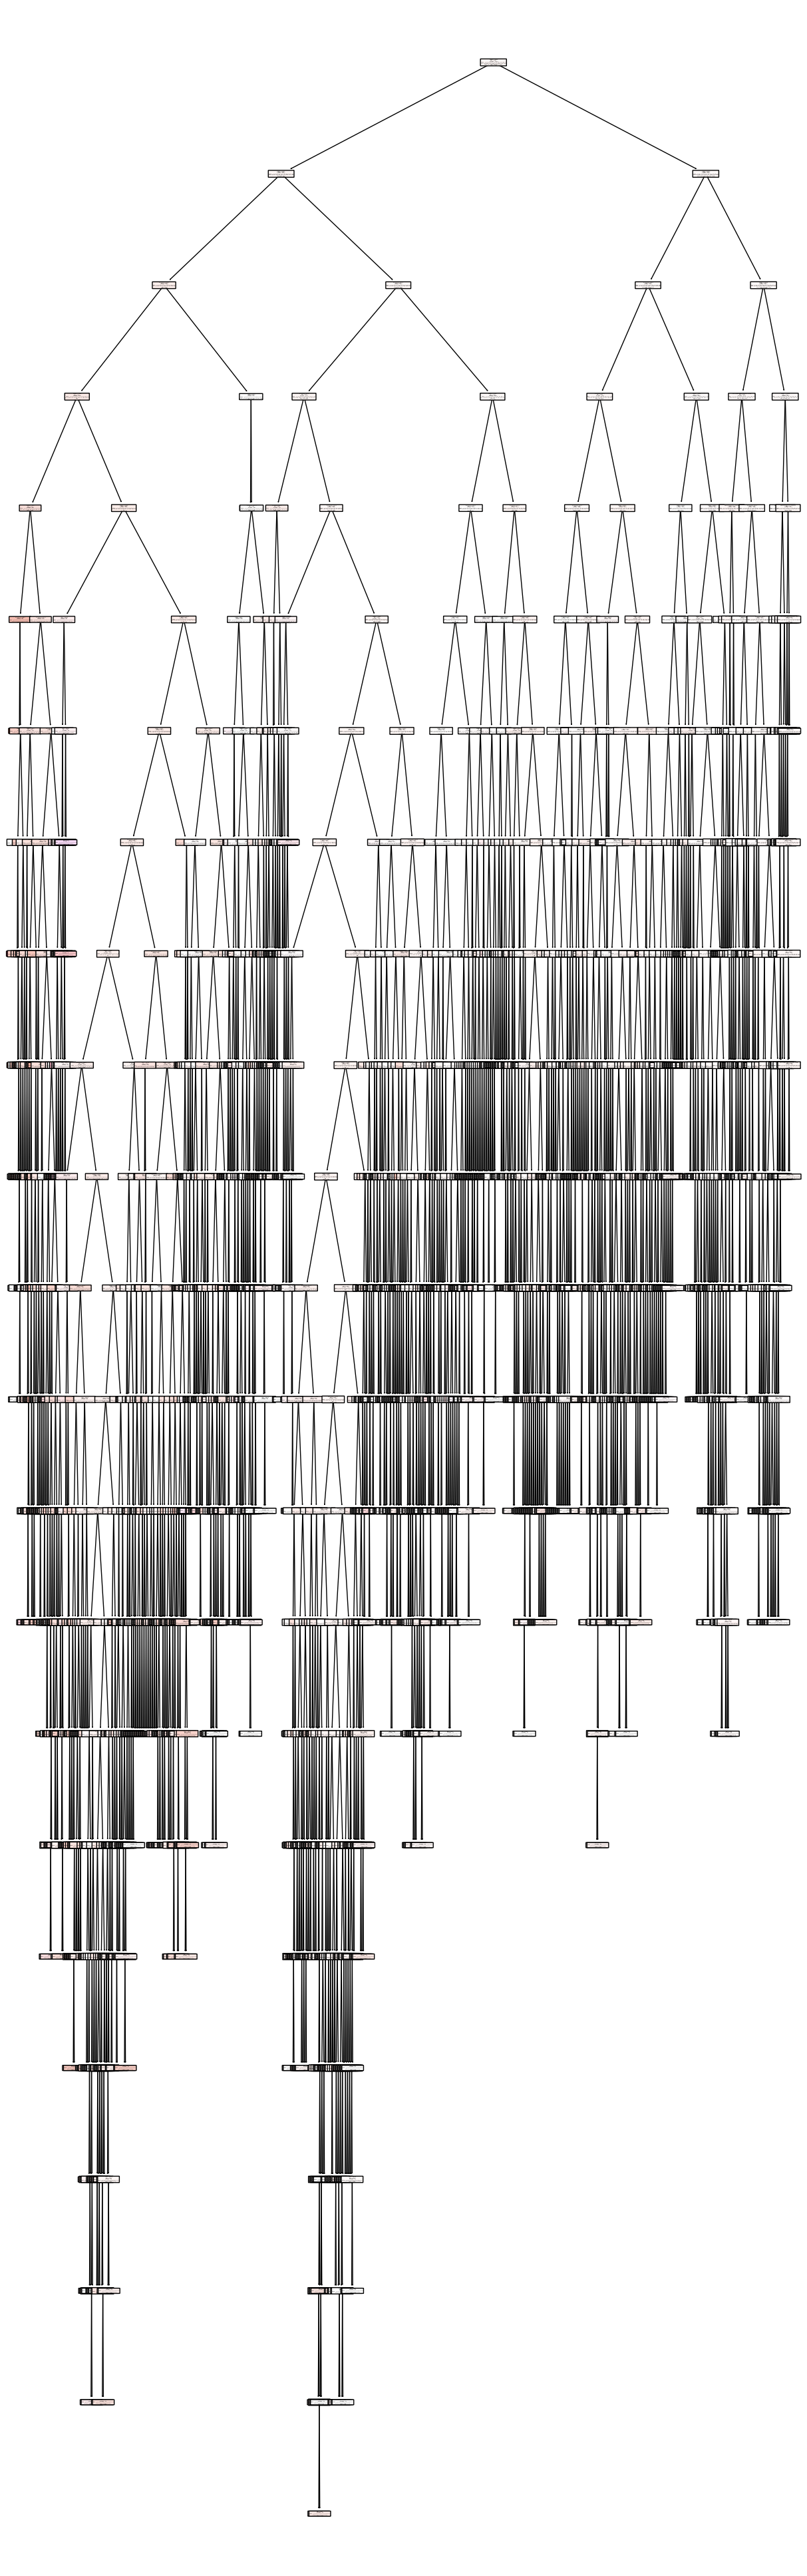

In [18]:

# Crear un clasificador de árbol de decisiones
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


class_names_str = [str(cls) for cls in clf.classes_]

plt.figure(figsize=(15, 50))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=class_names_str, rounded=True)
plt.show()
